Libraries

In [2]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

In [5]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Model Training 

Linear regression

In [6]:
model = Pipeline([
    ("scaler", StandardScaler()), # This algorithm needs scaling
    ("lin_reg", LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9992, Training CV RMSE: 86.8215
Training R²: 0.9992, Training RMSE: 90.2352
Validation R²: 0.0000, Validation RMSE: 9449.2035


Decision Tree Regessor

In [7]:
model = Pipeline([
    ("DecisionTree_reg", DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9526, Training CV RMSE: 678.7935
Training R²: 1.0000, Training RMSE: 0.0000
Validation R²: 0.0000, Validation RMSE: 9452.5176


Random Forest Regressor

In [8]:
model = Pipeline([
    ("RandomForest_reg", RandomForestRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9863, Training CV RMSE: 367.1493
Training R²: 0.9983, Training RMSE: 128.0910
Validation R²: 0.0000, Validation RMSE: 9405.2309


In [9]:
model = Pipeline([
    ("scaler", StandardScaler()), # Scaling the features
    ("svr", SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.0779, Training CV RMSE: 3006.3904
Training R²: 0.0980, Training RMSE: 2974.5141
Validation R²: 0.0000, Validation RMSE: 8840.0573


XGBoost Regressor

In [10]:
model = Pipeline([
    ("scaler", StandardScaler()), # Scaling the features
    ("xgb", XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9930, Training CV RMSE: 260.9659
Training R²: 0.9982, Training RMSE: 133.9068
Validation R²: 0.0000, Validation RMSE: 9442.9813


CatBoost Regressor

In [11]:
model = Pipeline([
    ("catboost", CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.054898
0:	learn: 3004.5993159	total: 77.3ms	remaining: 1m 17s
1:	learn: 2875.9099909	total: 78.8ms	remaining: 39.3s
2:	learn: 2759.0558174	total: 80.3ms	remaining: 26.7s
3:	learn: 2647.2326090	total: 82ms	remaining: 20.4s
4:	learn: 2544.2898499	total: 83.5ms	remaining: 16.6s
5:	learn: 2442.7824442	total: 85ms	remaining: 14.1s
6:	learn: 2343.4270421	total: 86.5ms	remaining: 12.3s
7:	learn: 2246.7556610	total: 88ms	remaining: 10.9s
8:	learn: 2155.3637666	total: 89.5ms	remaining: 9.85s
9:	learn: 2070.2697957	total: 90.9ms	remaining: 9s
10:	learn: 1987.0697619	total: 92.4ms	remaining: 8.3s
11:	learn: 1908.6830872	total: 93.9ms	remaining: 7.73s
12:	learn: 1837.1181841	total: 95.4ms	remaining: 7.24s
13:	learn: 1766.0078767	total: 96.8ms	remaining: 6.82s
14:	learn: 1698.8361563	total: 98.3ms	remaining: 6.45s
15:	learn: 1635.6695686	total: 99.9ms	remaining: 6.14s
16:	learn: 1576.8370874	total: 101ms	remaining: 5.87s
17:	learn: 1517.2670575	total: 103ms	remaining: 5.61s
1

AdaBoost Regression

In [12]:
model = Pipeline([
    ("adaboost", AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9100, Training CV RMSE: 922.1426
Training R²: 0.9170, Training RMSE: 902.5711
Validation R²: 0.0000, Validation RMSE: 9334.1290


Model Selection

CatBoost is the best model as per the results

In [13]:
best_model = CatBoostRegressor(verbose=0)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Training CV R²: 0.9997, Training CV RMSE: 50.3644
Training R²: 0.9999, Training RMSE: 28.3299
Validation R²: 0.0000, Validation RMSE: 9447.4426


In [14]:
model = Pipeline([
    ("scaler", StandardScaler()), # This algorithm needs scaling
    ("lin_reg", LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9992, Training CV RMSE: 86.8215
Training R²: 0.9992, Training RMSE: 90.2352
Validation R²: 0.0000, Validation RMSE: 9449.2035


In [15]:
model = Pipeline([
    ("DecisionTree_reg", DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9529, Training CV RMSE: 680.9283
Training R²: 1.0000, Training RMSE: 0.0000
Validation R²: 0.0000, Validation RMSE: 9455.8592


In [16]:
model = Pipeline([
    ("RandomForest_reg", RandomForestRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9863, Training CV RMSE: 366.9237
Training R²: 0.9984, Training RMSE: 126.7508
Validation R²: 0.0000, Validation RMSE: 9405.7430


In [17]:
model = Pipeline([
    ("scaler", StandardScaler()), # Scaling the features
    ("svr", SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.0779, Training CV RMSE: 3006.3904
Training R²: 0.0980, Training RMSE: 2974.5141
Validation R²: 0.0000, Validation RMSE: 8840.0573


In [18]:
model = Pipeline([
    ("scaler", StandardScaler()), # Scaling the features
    ("xgb", XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R²: 0.9930, Training CV RMSE: 260.9659
Training R²: 0.9982, Training RMSE: 133.9068
Validation R²: 0.0000, Validation RMSE: 9442.9813


In [19]:
model = Pipeline([
    ("catboost", CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.054898
0:	learn: 3004.5993159	total: 1.96ms	remaining: 1.96s
1:	learn: 2875.9099909	total: 3.75ms	remaining: 1.87s
2:	learn: 2759.0558174	total: 5.48ms	remaining: 1.82s
3:	learn: 2647.2326090	total: 7.1ms	remaining: 1.77s
4:	learn: 2544.2898499	total: 8.67ms	remaining: 1.73s
5:	learn: 2442.7824442	total: 10.5ms	remaining: 1.73s
6:	learn: 2343.4270421	total: 12.3ms	remaining: 1.74s
7:	learn: 2246.7556610	total: 13.8ms	remaining: 1.72s
8:	learn: 2155.3637666	total: 15.4ms	remaining: 1.7s
9:	learn: 2070.2697957	total: 17.1ms	remaining: 1.69s
10:	learn: 1987.0697619	total: 18.7ms	remaining: 1.68s
11:	learn: 1908.6830872	total: 20.3ms	remaining: 1.67s
12:	learn: 1837.1181841	total: 21.8ms	remaining: 1.65s
13:	learn: 1766.0078767	total: 23.5ms	remaining: 1.65s
14:	learn: 1698.8361563	total: 25.1ms	remaining: 1.65s
15:	learn: 1635.6695686	total: 26.7ms	remaining: 1.64s
16:	learn: 1576.8370874	total: 28.1ms	remaining: 1.63s
17:	learn: 1517.2670575	total: 29.8ms	remaining

In [20]:
best_model = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Learning rate set to 0.054898
0:	learn: 3004.5993159	total: 1.82ms	remaining: 1.82s
1:	learn: 2875.9099909	total: 3.64ms	remaining: 1.82s
2:	learn: 2759.0558174	total: 5.29ms	remaining: 1.76s
3:	learn: 2647.2326090	total: 6.82ms	remaining: 1.7s
4:	learn: 2544.2898499	total: 8.46ms	remaining: 1.68s
5:	learn: 2442.7824442	total: 10.3ms	remaining: 1.7s
6:	learn: 2343.4270421	total: 11.8ms	remaining: 1.68s
7:	learn: 2246.7556610	total: 13.5ms	remaining: 1.68s
8:	learn: 2155.3637666	total: 15.1ms	remaining: 1.67s
9:	learn: 2070.2697957	total: 16.8ms	remaining: 1.67s
10:	learn: 1987.0697619	total: 18.3ms	remaining: 1.65s
11:	learn: 1908.6830872	total: 19.9ms	remaining: 1.64s
12:	learn: 1837.1181841	total: 21.3ms	remaining: 1.62s
13:	learn: 1766.0078767	total: 23ms	remaining: 1.62s
14:	learn: 1698.8361563	total: 24.6ms	remaining: 1.62s
15:	learn: 1635.6695686	total: 26.1ms	remaining: 1.6s
16:	learn: 1576.8370874	total: 27.5ms	remaining: 1.59s
17:	learn: 1517.2670575	total: 29.2ms	remaining: 1

Tune model with hyperparameter

In [21]:
param_grid = {
    'iterations': [100, 200], # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1], # Step size at each iteration
    'depth': [4, 6, 8], # Depth of the trees
    'l2_leaf_reg': [1, 3, 5], # L2 regularization coefficient
    'border_count': [32, 64] # Number of splits in categorical features
}

grid_search = GridSearchCV(estimator=best_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 2878.2141375	total: 2.45ms	remaining: 487ms
1:	learn: 2651.1001638	total: 4.59ms	remaining: 455ms
2:	learn: 2441.6444542	total: 6.79ms	remaining: 446ms
3:	learn: 2241.4274430	total: 9.06ms	remaining: 444ms
4:	learn: 2064.4270200	total: 11.1ms	remaining: 434ms
5:	learn: 1900.7997252	total: 13.4ms	remaining: 435ms
6:	learn: 1747.3521760	total: 15.5ms	remaining: 429ms
7:	learn: 1611.6689961	total: 17.7ms	remaining: 425ms
8:	learn: 1481.9689678	total: 19.9ms	remaining: 423ms
9:	learn: 1370.9889145	total: 22.1ms	remaining: 419ms
10:	learn: 1269.8207695	total: 24.1ms	remaining: 415ms
11:	learn: 1180.2149834	total: 26.5ms	remaining: 415ms
12:	learn: 1088.7622247	total: 28.7ms	remaining: 413ms
13:	learn: 1009.1446196	total: 30.8ms	remaining: 410ms
14:	learn: 932.1082954	total: 33.3ms	remaining: 411ms
15:	learn: 867.6238409	total: 35.6ms	remaining: 410ms
16:	learn: 804.1063795	total: 37.9ms	remaining: 408ms
17:	learn: 747.

In [22]:
best_model_tuned = grid_search.best_estimator_

In [23]:
best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print(f"Training CV R²: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model_tuned.fit(X_train, y_train)

y_train_pred = best_model_tuned.predict(X_train)
y_val_pred = best_model_tuned.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Training R²: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R²: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

0:	learn: 2876.6924020	total: 2.18ms	remaining: 435ms
1:	learn: 2648.8097697	total: 3.83ms	remaining: 379ms
2:	learn: 2430.2500903	total: 5.46ms	remaining: 359ms
3:	learn: 2239.1376561	total: 7.28ms	remaining: 357ms
4:	learn: 2064.0207238	total: 9.04ms	remaining: 352ms
5:	learn: 1912.6404072	total: 10.8ms	remaining: 349ms
6:	learn: 1759.4441777	total: 12.5ms	remaining: 343ms
7:	learn: 1619.3990850	total: 14.3ms	remaining: 343ms
8:	learn: 1493.1154283	total: 16ms	remaining: 339ms
9:	learn: 1379.0437170	total: 17.6ms	remaining: 335ms
10:	learn: 1274.7408225	total: 19.4ms	remaining: 333ms
11:	learn: 1177.9195782	total: 21.2ms	remaining: 332ms
12:	learn: 1093.4798201	total: 22.9ms	remaining: 329ms
13:	learn: 1011.4248484	total: 24.5ms	remaining: 326ms
14:	learn: 938.9725634	total: 26.3ms	remaining: 325ms
15:	learn: 872.0436526	total: 27.9ms	remaining: 321ms
16:	learn: 808.1071217	total: 29.6ms	remaining: 319ms
17:	learn: 747.9116087	total: 31.2ms	remaining: 316ms
18:	learn: 698.5225212	tot

In [24]:
final_model = best_model

Final Evaluation of model

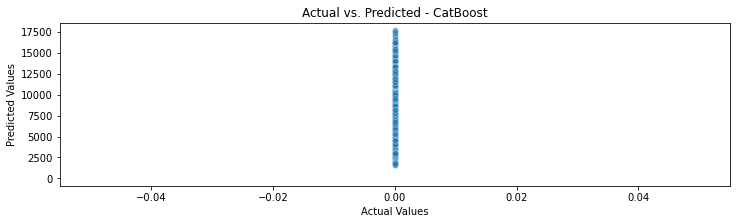

In [27]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(12,3))

sns.scatterplot(x=y_val, 
                y=y_val_pred, 
                alpha=0.5)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted - CatBoost")
plt.show()

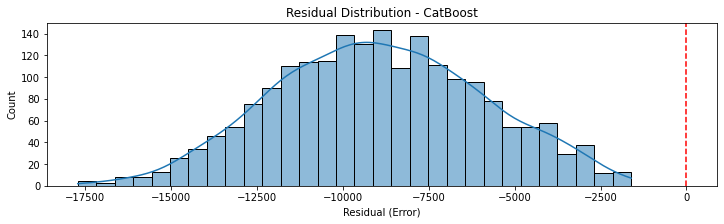

In [28]:
 #Residual Plot (Errors)
residuals = y_val - y_val_pred
plt.figure(figsize=(12, 3))

sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution - CatBoost")
plt.show()

In [29]:
with open('../../models/Brand_Encoder.pkl', 'rb') as f:
    brand_encoder = pickle.load(f) #Brand

with open('../../models/Model_Encoder.pkl', 'rb') as f:
    model_encoder = pickle.load(f) #Model

with open('../../models/OneHot_Encoder.pkl', 'rb') as f:
    onehot_encoder = pickle.load(f) #Fuel, Transmission

In [33]:
# Encode Brand and Model only if they exist in X_test
if 'Brand' in X_test.columns and 'Model' in X_test.columns:
    X_test['Encoded_Brand'] = X_test['Brand'].map(brand_encoder)
    X_test['Encoded_Model'] = X_test['Model'].map(model_encoder)

    # Fill missing values with mean encoding
    X_test['Encoded_Brand'].fillna(X_test['Encoded_Brand'].mean(), inplace=True)
    X_test['Encoded_Model'].fillna(X_test['Encoded_Model'].mean(), inplace=True)

    # Drop original columns
    X_test.drop(['Brand', 'Model'], axis=1, inplace=True)

# Encoding Fuel and Transmission
categorical_cols = ['Fuel', 'Transmission']
if all(col in X_test.columns for col in categorical_cols):
    encoded_array_test = onehot_encoder.transform(X_test[categorical_cols])

    try:
        feature_names = onehot_encoder.get_feature_names_out(categorical_cols)
    except AttributeError:
        feature_names = onehot_encoder.get_feature_names(categorical_cols)

    encoded_df_test = pd.DataFrame(encoded_array_test, columns=feature_names)

    # Merge encoded columns with test data
    X_test_encoded = X_test.drop(columns=categorical_cols).reset_index(drop=True)
    X_test = pd.concat([X_test_encoded, encoded_df_test.reset_index(drop=True)], axis=1)
else:
    print("One or more categorical columns are missing in X_test.")

In [34]:
y_test_pred = final_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R²: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")

Test R²: 0.9998, Test RMSE: 41.1359


Checkpoint

In [35]:
pickle.dump(final_model, open('../../models/Models.pkl', 'wb'))